In [48]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
END = "\n----------------------------------------------------------------------\n"

# Read in data
df = pd.read_csv('Student_Dropout.csv')

In [49]:
# Removing all entries where label is 'Enrolled'
df = df[df['Target'] != 'Enrolled']

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split into train, test, and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=42)
print(y_train[0:10], END, y_test[0:10])

['Graduate' 'Graduate' 'Graduate' 'Dropout' 'Graduate' 'Graduate'
 'Graduate' 'Graduate' 'Graduate' 'Graduate'] 
----------------------------------------------------------------------
 ['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Graduate' 'Graduate'
 'Graduate' 'Dropout' 'Graduate' 'Graduate']


In [50]:
# Some values are wildly different from others, so we will do feature scaling.
# Using standard scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Performing one hot encoding on the y set and converting it to 
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

print(x_train[3][0:10], END)
print(x_test[3][0:10], END)
print(y_train[0:10], END)
print(y_test[0:10])

[ 1.38413749  1.20280347 -0.56687775  0.15633763  0.34694433 -0.35236878
  0.53346381 -0.12386937  0.92676966  0.76047586] 
----------------------------------------------------------------------

[-0.29814569 -0.06537263  1.6563991   0.13416155  0.34694433 -0.35236878
  1.14631232 -0.12386937 -1.19776842 -1.26356266] 
----------------------------------------------------------------------

[1 1 1 0 1 1 1 1 1 1] 
----------------------------------------------------------------------

[0 1 1 1 1 1 1 0 1 1]


In [53]:
# Training the model
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)
print()

In [54]:
# Predictions
y_pred1 = classifier.predict(x_val)

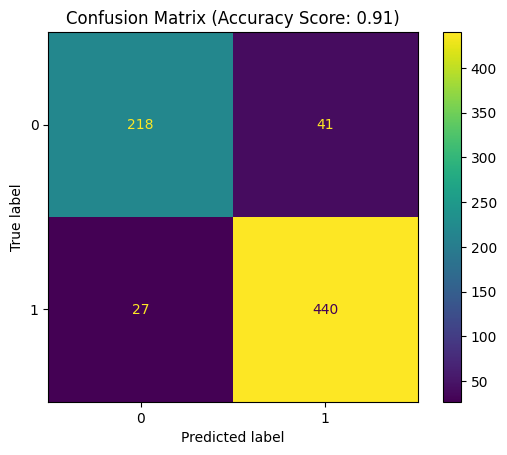

In [55]:
# Visualizing confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.title(f"Confusion Matrix (Accuracy Score: {round(accuracy_score(y_val, y_pred1), 2)})")
plt.show()

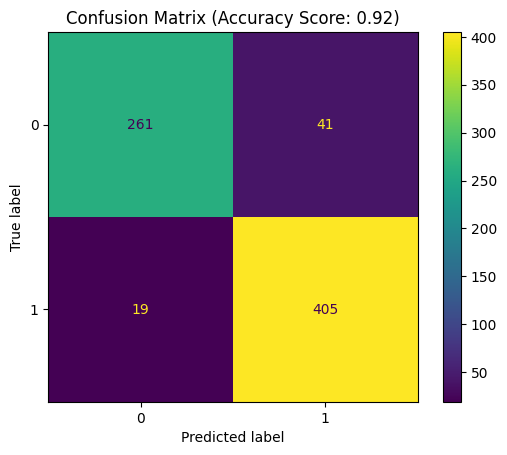

In [56]:
# Testing using test set

# Predictions
y_pred2 = classifier.predict(x_test)
# Visualizing confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.title(f"Confusion Matrix (Accuracy Score: {round(accuracy_score(y_test, y_pred2), 2)})")
plt.show()